# **Deep Learning Classifier**

![DL_model-2.png](attachment:DL_model-2.png "Deep Learning Model")

The Deep Learning model consists of two parts: the graph autoencoder and the multi-classifier. The graph autoencoder transforms a SCDG into a feature vector which is possible to be handled by the multi-classifier. Then, the multi-classifier takes the feature vector as input, and produces a predicted label of SCDG associated with this feature vector. The model is first trained on the training set, and then, is used to classify malwares. These steps are implemented by __SEMA__ as follows.
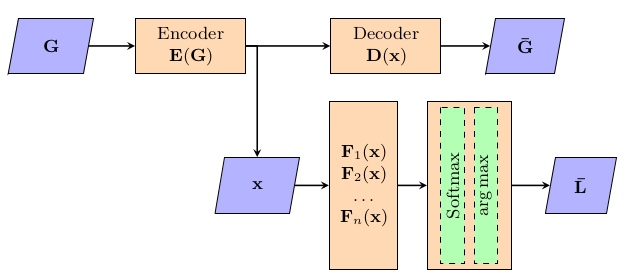

## **Using SEMA toolchain**

In [1]:
import os
os.chdir('../../src')
os.getcwd()
!python ToolChainClassifier/ToolChainClassifier.py -h

usage: ToolChainClassifier.py [-h] [--train] [--classifier CLASSIFIER]
                              [--threshold THRESHOLD]
                              [--biggest_subgraph BIGGEST_SUBGRAPH]
                              [--support SUPPORT] [--nthread NTHREAD]
                              [--verbose_classifier] [--ctimeout CTIMEOUT]
                              [--families FAMILIES [FAMILIES ...]]
                              [--mode MODE] [--epoch EPOCH]
                              binaries

Classification module arguments

optional arguments:
  -h, --help            show this help message and exit
  --biggest_subgraph BIGGEST_SUBGRAPH
                        Biggest subgraph consider for Gspan (default: 5)

Classification module arguments:
  --train               Launch training process, else classify/detect new
                        sample with previously computed model
  --classifier CLASSIFIER
                        Classifier used for the analysis among
                

### **Train model**
We train the deep learning model on malwares in the given path, i.e., "../Tutorial/DATA/CLASS_DATA/TRAIN". Then, the trained model is saved and used for classify new malwares. If the given path contains only two labels (cleanware and malware), i.e., "../Tutorial/DATA/BIN_DATA/TRAIN", the trained model is a detection model which detect malwares from cleanwares. We train the deep learning model on malwares in the folder "../Tutorial/DATA/CLASS_DATA/TRAIN" during 10 epochs as follows.

In [2]:
!python ToolChainClassifier/ToolChainClassifier.py --train --classifier dl --epoch 10 ../Tutorial/DATA/CLASS_DATA/TRAIN

INFO - 2022-05-02 22:57:35,808 - ToolChainClassifier - ['../Tutorial/DATA/CLASS_DATA/TRAIN/autoit', '../Tutorial/DATA/CLASS_DATA/TRAIN/bancteian', '../Tutorial/DATA/CLASS_DATA/TRAIN/delf', '../Tutorial/DATA/CLASS_DATA/TRAIN/ircbot', '../Tutorial/DATA/CLASS_DATA/TRAIN/sfone', '../Tutorial/DATA/CLASS_DATA/TRAIN/shiz', '../Tutorial/DATA/CLASS_DATA/TRAIN/sillyp2p', '../Tutorial/DATA/CLASS_DATA/TRAIN/simbot', '../Tutorial/DATA/CLASS_DATA/TRAIN/sytro', '../Tutorial/DATA/CLASS_DATA/TRAIN/wabot']
INFO - 2022-05-02 22:57:35,808 - ToolChainClassifier - Namespace(biggest_subgraph=5, binaries='../Tutorial/DATA/CLASS_DATA/TRAIN', classifier='dl', ctimeout=3, epoch=10, families=None, mode=None, nthread=8, support=0.75, threshold=0.45, train=True, verbose_classifier=False)
INFO - 2022-05-02 22:57:38,271 - DLDataset - Loading data from ../Tutorial/DATA/CLASS_DATA/TRAIN
100% (250 of 250) |######################| Elapsed Time: 0:00:15 Time:  0:00:15
INFO - 2022-05-02 22:57:53,736 - DLTrainerClassifier -

### **Use the trained model to classify malwares**
We use the trained model to detect/classify new programs/malwares given in the folder "../Tutorial/DATA/CLASS_DATA/TEST". To simplify the evaluation task, we group programs into folders and each folder represents the true label of programs. Using the trained model, we classify malwares in the folder "../Tutorial/DATA/CLASS_DATA/TEST" as follows.

In [3]:
!python ToolChainClassifier/ToolChainClassifier.py --mode classification --classifier dl ../Tutorial/DATA/CLASS_DATA/TEST

INFO - 2022-05-02 23:10:07,495 - ToolChainClassifier - ['../Tutorial/DATA/CLASS_DATA/TEST/autoit', '../Tutorial/DATA/CLASS_DATA/TEST/bancteian', '../Tutorial/DATA/CLASS_DATA/TEST/delf', '../Tutorial/DATA/CLASS_DATA/TEST/ircbot', '../Tutorial/DATA/CLASS_DATA/TEST/sfone', '../Tutorial/DATA/CLASS_DATA/TEST/shiz', '../Tutorial/DATA/CLASS_DATA/TEST/sillyp2p', '../Tutorial/DATA/CLASS_DATA/TEST/simbot', '../Tutorial/DATA/CLASS_DATA/TEST/sytro', '../Tutorial/DATA/CLASS_DATA/TEST/wabot']
INFO - 2022-05-02 23:10:07,495 - ToolChainClassifier - Namespace(biggest_subgraph=5, binaries='../Tutorial/DATA/CLASS_DATA/TEST', classifier='dl', ctimeout=3, epoch=5, families=None, mode='classification', nthread=8, support=0.75, threshold=0.45, train=False, verbose_classifier=False)
INFO - 2022-05-02 23:10:08,656 - DLDataset - Loading data from ../Tutorial/DATA/CLASS_DATA/TEST
100% (50 of 50) |########################| Elapsed Time: 0:00:02 Time:  0:00:02
(00433191a896734271556918917ecec6.gs, autoit) is predi

## **Import SEMA toolchain into your code**
The following will show how to integrate our SEMA part into your code.

**Import the deep learning model from the SEMA Classifier**

We import two classes __DLDataset__ which is used to load the graph data, and __DLTrainerClassifier__ which is used to train the deep learning model.

In [4]:
from ToolChainClassifier.classifier.DL import DLDataset, DLTrainerClassifier

### **Train a classification model**
We train the classification model on malwares in the given path, i.e., "../Tutorial/DATA/CLASS_DATA/TRAIN". The training losses are reported by the matplot.

INFO - 2022-05-02 23:10:16,797 - DLDataset - Loading data from ../Tutorial/DATA/CLASS_DATA/TRAIN
100% (250 of 250) |######################| Elapsed Time: 0:00:15 Time:  0:00:15
INFO - 2022-05-02 23:10:32,022 - DLTrainerClassifier - Epoch 1/5:
100% (250 of 250) |######################| Elapsed Time: 0:01:18 Time:  0:01:18
INFO - 2022-05-02 23:11:50,466 - DLTrainerClassifier - 	Epoch 1: Train loss 0.30935704521007007 - Val loss 0.22336073070764542
INFO - 2022-05-02 23:11:50,467 - DLTrainerClassifier - Epoch 2/5:
100% (250 of 250) |######################| Elapsed Time: 0:01:19 Time:  0:01:19
INFO - 2022-05-02 23:13:10,416 - DLTrainerClassifier - 	Epoch 2: Train loss 0.20827626312772432 - Val loss 0.16572390198707582
INFO - 2022-05-02 23:13:10,417 - DLTrainerClassifier - Epoch 3/5:
100% (250 of 250) |######################| Elapsed Time: 0:01:19 Time:  0:01:19
INFO - 2022-05-02 23:14:30,284 - DLTrainerClassifier - 	Epoch 3: Train loss 0.1371633462442292 - Val loss 0.1337244638800621
INFO -

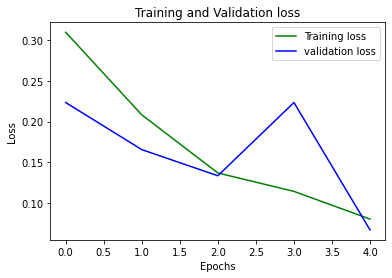

In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, balanced_accuracy_score, accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

#Path to malwares groupped into folders which are their true label
dbtrain = "../Tutorial/DATA/CLASS_DATA/TRAIN"

#Create the trainer model
trainer = DLTrainerClassifier.DLTrainerClassifier("",epoch=5,data_scale=0.9)

#Train the model on malwares in the given path
model,his = trainer.train(dbtrain)

#Report the training results
epochs = range(trainer.n_epochs)
plt.plot(epochs, his["train"], 'g', label='Training loss')
plt.plot(epochs, his["val"], 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
_= plt.legend()

### **Use the trained model to classify malwares**
We use the trained model to classify malwares in the folder "../Tutorial/DATA/CLASS_DATA/TEST".

INFO - 2022-05-02 23:17:15,008 - DLDataset - Loading data from ../Tutorial/DATA/CLASS_DATA/TEST
INFO - 2022-05-02 23:17:15,008 - DLDataset - Loading data from ../Tutorial/DATA/CLASS_DATA/TEST
100% (50 of 50) |########################| Elapsed Time: 0:00:02 Time:  0:00:02


(00433191a896734271556918917ecec6.gs, autoit) is predicted as autoit (prob 1.00)
(004c9c07fea878f4d316f831ff1912ea.gs, autoit) is predicted as autoit (prob 1.00)
(005cfe4b8d323cf1b50e06cc2b968323.gs, autoit) is predicted as autoit (prob 1.00)
(00713d6ea858ecd08877a4ec5392be1d.gs, autoit) is predicted as autoit (prob 1.00)
(0079237db0f09f55c7cf72b7e6c53594.gs, autoit) is predicted as autoit (prob 1.00)
(00b1843043a212578c3da3fa75efeed1.gs, bancteian) is predicted as bancteian (prob 0.99)
(00b237028fe02c2342c4f0b68868babb.gs, bancteian) is predicted as bancteian (prob 0.99)
(00b2b23d4d171d63209cb50741545e14.gs, bancteian) is predicted as bancteian (prob 1.00)
(00c1a2379eb021a4d6f2e3a468fbd8f6.gs, bancteian) is predicted as bancteian (prob 1.00)
(00c86efd50196d7c001d0bea4b0192ce.gs, bancteian) is predicted as bancteian (prob 1.00)
(00ac22ddb982609720358eadbfcdba91.gs, delf) is predicted as delf (prob 0.83)
(03356e792253776c701295361e9f1659.gs, delf) is predicted as delf (prob 0.91)
(0760b

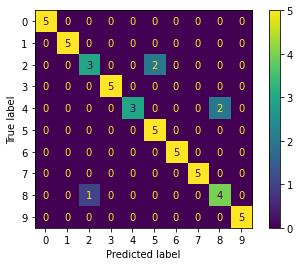

In [6]:
#Path to malwares groupped into folders which are their true label
dbtest = "../Tutorial/DATA/CLASS_DATA/TEST"

#Classify malwares from the given path
y_pred, y_true = trainer.classify(dbtest)

#Report the results
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
acc = accuracy_score(y_true, y_pred)
bacc = balanced_accuracy_score(y_true, y_pred)
fscore = f1_score(y_true,y_pred, average='weighted')
print(f"Accuracy: {acc}\nBalanced accuracy: {bacc}\nf-score: {fscore}")

### **Use the graph encoder to convert graphs to feature vectors**
The graphs of malwares in the test set are encoded by the graph encoder. Then, these vectors are transformed to view in a 2D-dimension by TSNE. Each malware class is represented by a color.

INFO - 2022-05-02 23:17:20,876 - DLDataset - Loading data from ../Tutorial/DATA/CLASS_DATA/TEST
INFO - 2022-05-02 23:17:20,876 - DLDataset - Loading data from ../Tutorial/DATA/CLASS_DATA/TEST
INFO - 2022-05-02 23:17:20,876 - DLDataset - Loading data from ../Tutorial/DATA/CLASS_DATA/TEST
100% (50 of 50) |########################| Elapsed Time: 0:00:03 Time:  0:00:03


['autoit', 'bancteian', 'delf', 'ircbot', 'sfone', 'shiz', 'sillyp2p', 'simbot', 'sytro', 'wabot']


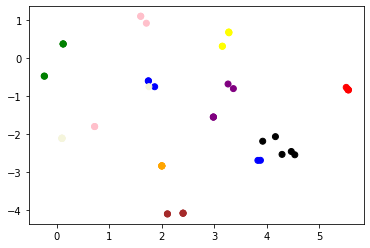

In [7]:
from sklearn.manifold import TSNE
import torch
import numpy as np
dset = DLDataset.DLDataset(dbtest,"mapping.txt","APInameseq.txt",4)
colors = np.array(["red","green","blue","yellow","pink","black","orange","purple","beige","brown","gray","cyan","magenta"])
classes = trainer.classe
wv = trainer.model.RNN.encode
X = list()
c = list()
for i in range(len(dset)):
    X.append(wv(dset[i][0]))
    c.append(colors[torch.where(dset[i][1]==1.)[1].item()])
Y = torch.cat(X, dim=0)
X_embedded = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(Y)
_ = plt.scatter(X_embedded[:,0] , X_embedded[:,1],c=c)
print(classes)

### **Train a dectection model**
We use the training set given in "../Tutorial/DATA/BIN_DATA/TRAIN" to train a detection model as follows.

INFO - 2022-05-02 23:17:25,543 - DLDataset - Loading data from ../Tutorial/DATA/BIN_DATA/TRAIN
INFO - 2022-05-02 23:17:25,543 - DLDataset - Loading data from ../Tutorial/DATA/BIN_DATA/TRAIN
INFO - 2022-05-02 23:17:25,543 - DLDataset - Loading data from ../Tutorial/DATA/BIN_DATA/TRAIN
INFO - 2022-05-02 23:17:25,543 - DLDataset - Loading data from ../Tutorial/DATA/BIN_DATA/TRAIN
100% (200 of 200) |######################| Elapsed Time: 0:00:31 Time:  0:00:31
INFO - 2022-05-02 23:17:57,470 - DLTrainerClassifier - Epoch 1/5:
INFO - 2022-05-02 23:17:57,470 - DLTrainerClassifier - Epoch 1/5:
100% (200 of 200) |######################| Elapsed Time: 0:03:59 Time:  0:03:59
INFO - 2022-05-02 23:21:57,215 - DLTrainerClassifier - 	Epoch 1: Train loss 0.620184742897335 - Val loss 0.31132501726970074
INFO - 2022-05-02 23:21:57,215 - DLTrainerClassifier - 	Epoch 1: Train loss 0.620184742897335 - Val loss 0.31132501726970074
INFO - 2022-05-02 23:21:57,216 - DLTrainerClassifier - Epoch 2/5:
INFO - 2022-

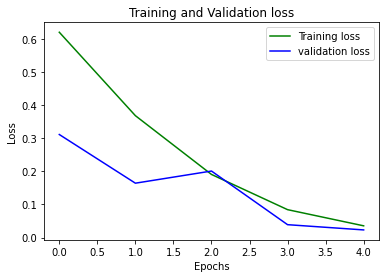

In [8]:
dbtrain = "../Tutorial/DATA/BIN_DATA/TRAIN"

trainer = DLTrainerClassifier.DLTrainerClassifier("",epoch=5,data_scale=0.9)

model,his = trainer.train(dbtrain)

epochs = range(trainer.n_epochs)
plt.plot(epochs, his["train"], 'g', label='Training loss')
plt.plot(epochs, his["val"], 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
_= plt.legend()

### **Use the trained model to detect new programs**
Then, the trained model is used to detect samples in "../Tutorial/DATA/BIN_DATA/TRAIN".

In [9]:
#Path to the new programs groupped into folders (their true label).
dbtest = "../Tutorial/DATA/BIN_DATA/TEST"

#Detect programs in the given path
y_pred, y_true  = trainer.classify(dbtest)

#Report the detection results
acc = accuracy_score(y_true, y_pred)
bacc = balanced_accuracy_score(y_true, y_pred)
fscore = f1_score(y_true,y_pred, average='weighted')
print(f"ACC: {acc}\nBACC: {bacc}\nf-score: {fscore}")

INFO - 2022-05-02 23:37:40,628 - DLDataset - Loading data from ../Tutorial/DATA/BIN_DATA/TEST
INFO - 2022-05-02 23:37:40,628 - DLDataset - Loading data from ../Tutorial/DATA/BIN_DATA/TEST
INFO - 2022-05-02 23:37:40,628 - DLDataset - Loading data from ../Tutorial/DATA/BIN_DATA/TEST
INFO - 2022-05-02 23:37:40,628 - DLDataset - Loading data from ../Tutorial/DATA/BIN_DATA/TEST
INFO - 2022-05-02 23:37:40,628 - DLDataset - Loading data from ../Tutorial/DATA/BIN_DATA/TEST
100% (30 of 30) |########################| Elapsed Time: 0:00:02 Time:  0:00:02


(06a6f469a19be1712a4ab2b6dee130172dcd74002eabdce4de422bb406d8baff.gs, cleanware) is predicted as cleanware (prob 1.00)
(3fc7052d15a6eec68d3911db975d0716f6809b00896776e2b966590f106327d2.gs, cleanware) is predicted as cleanware (prob 1.00)
(3fed2049c67d7b45222dab43cc1caaa00edc73d62f05ab35ca017b1955ce9865.gs, cleanware) is predicted as cleanware (prob 1.00)
(4abc1c7d6392012ec4a431d486e5a87fdda1f801fa39f385791fe4f1019c719b.gs, cleanware) is predicted as cleanware (prob 0.54)
(4b04199bafc6887a0f209fe692733d154b4ef35a3e5ddc092697959c9841b8e3.gs, cleanware) is predicted as cleanware (prob 1.00)
(4b3b6bb2e69eec9628d838f5bd0ecff1d5a4a4a3946d1059aecb1e3e2a442394.gs, cleanware) is predicted as cleanware (prob 1.00)
(4b73e553ef155728384a2e1a065d991f958316a37624db5854bbda23a321e412.gs, cleanware) is predicted as cleanware (prob 1.00)
(4b9352d05e2fb374b5e9a9a2e0ff691a05c7980ae9acbecc87d4d2bb330d832e.gs, cleanware) is predicted as cleanware (prob 0.99)
(4bc2b8ca3e8a2b5b5d7a9721999956a52fc35adb6667308